In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

In [2]:
df=pd.read_csv("data/raw.csv")
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611


In [3]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [4]:
df.duplicated().sum()

0

In [5]:
df['Screen Size'] = df['Screen Size'].str.replace('"', '').astype(float)
df['RAM'] = df['RAM'].str.replace('GB', '').astype('int64')
df['Storage'] = df['Storage'].str.extract('(\d+)').astype('int64')
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,NaN,1.37,11912523
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,NaN,1.34,7993374
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,NaN,1.86,5112900
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,NaN,1.83,22563005
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,NaN,1.37,16037611


In [6]:
df = df.drop(columns=['CPU'])
df = df.drop(columns=['GPU'])
df = df.drop(columns=['Operating System Version'])

In [7]:
df['Screen'] = df['Screen'].astype(str)

df['Screen Name'] = df['Screen'].apply(lambda x: x.split(' ')[0:-1])

df['Screen Resolution'] = df['Screen'].apply(lambda x: x.split(' ')[-1])

df.drop(columns=["Screen"],inplace=True)
df.head()

,Manufacturer,Model Name,Category,Screen Size,RAM,Storage,Operating System,Weight,Price,Screen Name,Screen Resolution
0,Apple,MacBook Pro,Ultrabook,13.3,8,128,macOS,1.37,11912523,"[IPS, Panel, Retina, Display]",2560x1600
1,Apple,Macbook Air,Ultrabook,13.3,8,128,macOS,1.34,7993374,[],1440x900
2,HP,250 G6,Notebook,15.6,8,256,No OS,1.86,5112900,"[Full, HD]",1920x1080
3,Apple,MacBook Pro,Ultrabook,15.4,16,512,macOS,1.83,22563005,"[IPS, Panel, Retina, Display]",2880x1800
4,Apple,MacBook Pro,Ultrabook,13.3,8,256,macOS,1.37,16037611,"[IPS, Panel, Retina, Display]",2560x1600


In [8]:
def multiply_resolution(resolution):
    width, height = map(int, resolution.split('x'))
    return width * height

df['Resolution Product'] = df['Screen Resolution'].apply(multiply_resolution)

df.drop(columns="Screen Resolution",inplace=True)
df.head()

,Manufacturer,Model Name,Category,Screen Size,RAM,Storage,Operating System,Weight,Price,Screen Name,Resolution Product
0,Apple,MacBook Pro,Ultrabook,13.3,8,128,macOS,1.37,11912523,"[IPS, Panel, Retina, Display]",4096000
1,Apple,Macbook Air,Ultrabook,13.3,8,128,macOS,1.34,7993374,[],1296000
2,HP,250 G6,Notebook,15.6,8,256,No OS,1.86,5112900,"[Full, HD]",2073600
3,Apple,MacBook Pro,Ultrabook,15.4,16,512,macOS,1.83,22563005,"[IPS, Panel, Retina, Display]",5184000
4,Apple,MacBook Pro,Ultrabook,13.3,8,256,macOS,1.37,16037611,"[IPS, Panel, Retina, Display]",4096000


In [9]:
df['Screen Name'] = df['Screen Name'].apply(lambda x: ' '.join(x))
df.head()

,Manufacturer,Model Name,Category,Screen Size,RAM,Storage,Operating System,Weight,Price,Screen Name,Resolution Product
0,Apple,MacBook Pro,Ultrabook,13.3,8,128,macOS,1.37,11912523,IPS Panel Retina Display,4096000
1,Apple,Macbook Air,Ultrabook,13.3,8,128,macOS,1.34,7993374,,1296000
2,HP,250 G6,Notebook,15.6,8,256,No OS,1.86,5112900,Full HD,2073600
3,Apple,MacBook Pro,Ultrabook,15.4,16,512,macOS,1.83,22563005,IPS Panel Retina Display,5184000
4,Apple,MacBook Pro,Ultrabook,13.3,8,256,macOS,1.37,16037611,IPS Panel Retina Display,4096000


In [10]:
df['Screen Name'] = df['Screen Name'].replace('', np.nan)
df['Screen Name'] = df.groupby('Manufacturer')['Screen Name'].ffill().bfill()
df.head()

,Manufacturer,Model Name,Category,Screen Size,RAM,Storage,Operating System,Weight,Price,Screen Name,Resolution Product
0,Apple,MacBook Pro,Ultrabook,13.3,8,128,macOS,1.37,11912523,IPS Panel Retina Display,4096000
1,Apple,Macbook Air,Ultrabook,13.3,8,128,macOS,1.34,7993374,IPS Panel Retina Display,1296000
2,HP,250 G6,Notebook,15.6,8,256,No OS,1.86,5112900,Full HD,2073600
3,Apple,MacBook Pro,Ultrabook,15.4,16,512,macOS,1.83,22563005,IPS Panel Retina Display,5184000
4,Apple,MacBook Pro,Ultrabook,13.3,8,256,macOS,1.37,16037611,IPS Panel Retina Display,4096000


Work on Issue

In [11]:
# Identify rare categories
threshold = 0.03 * len(df)  # Set threshold as 3% of the dataset size
manufacturer_counts = df['Manufacturer'].value_counts()
rare_manufacturers = manufacturer_counts[manufacturer_counts < threshold].index

# Replace rare categories with 'Other'
df['Manufacturer'] = df['Manufacturer'].apply(lambda x: 'Other Manufacturer' if x in rare_manufacturers else x)

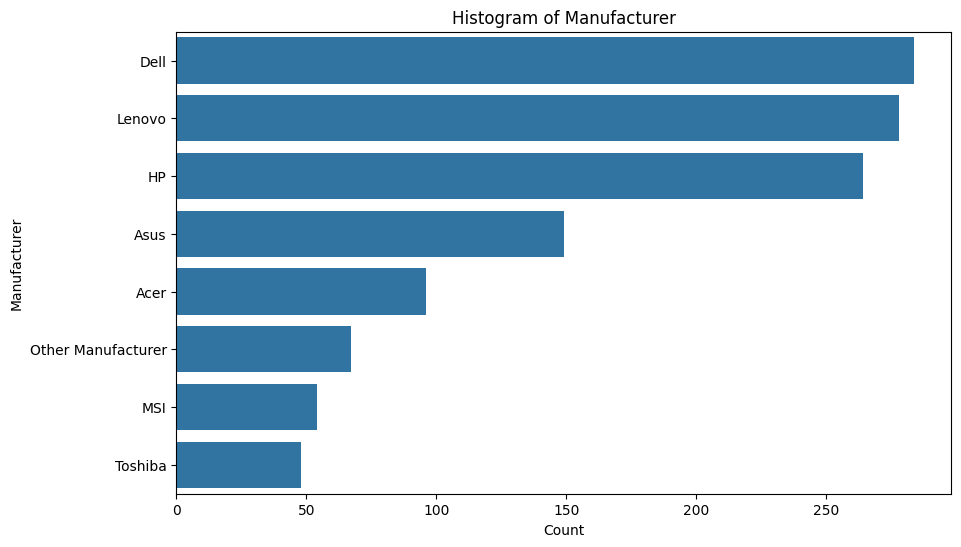

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Manufacturer', data=df, order=df['Manufacturer'].value_counts().index)
plt.title('Histogram of Manufacturer')
plt.xlabel('Count')
plt.ylabel('Manufacturer')
plt.show()

In [13]:
df.drop(columns="Model Name",inplace=True)

In [14]:
df.head()

,Manufacturer,Category,Screen Size,RAM,Storage,Operating System,Weight,Price,Screen Name,Resolution Product
0,Other Manufacturer,Ultrabook,13.3,8,128,macOS,1.37,11912523,IPS Panel Retina Display,4096000
1,Other Manufacturer,Ultrabook,13.3,8,128,macOS,1.34,7993374,IPS Panel Retina Display,1296000
2,HP,Notebook,15.6,8,256,No OS,1.86,5112900,Full HD,2073600
3,Other Manufacturer,Ultrabook,15.4,16,512,macOS,1.83,22563005,IPS Panel Retina Display,5184000
4,Other Manufacturer,Ultrabook,13.3,8,256,macOS,1.37,16037611,IPS Panel Retina Display,4096000


In [15]:
def capping_outliers(column_names):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_names].quantile(0.25)
    Q3 = df[column_names].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    df[column_names] = df[column_names].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

    # Check remaining outliers
    remaining_outliers = df[(df[column_names] < lower_bound) | (df[column_names] > upper_bound)]
    num_remaining_outliers = remaining_outliers.shape[0]

    print(f'The number of remaining outliers in the column after capping is: {num_remaining_outliers}')

In [16]:
capping_outliers("Screen Size")
capping_outliers("RAM")
capping_outliers("Weight")
capping_outliers("Price")
capping_outliers("Resolution Product")

The number of remaining outliers in the column after capping is: 0
The number of remaining outliers in the column after capping is: 0
The number of remaining outliers in the column after capping is: 0
The number of remaining outliers in the column after capping is: 0
The number of remaining outliers in the column after capping is: 0


In [17]:
df['Operating System'] = df['Operating System'].replace(['No OS', 'macOS', 'Mac OS','Chrome OS'], 'MacOS')
df.head()

,Manufacturer,Category,Screen Size,RAM,Storage,Operating System,Weight,Price,Screen Name,Resolution Product
0,Other Manufacturer,Ultrabook,13.3,8.0,128,MacOS,1.37,11912523.0,IPS Panel Retina Display,2073600.0
1,Other Manufacturer,Ultrabook,13.3,8.0,128,MacOS,1.34,7993374.0,IPS Panel Retina Display,2073600.0
2,HP,Notebook,15.6,8.0,256,MacOS,1.86,5112900.0,Full HD,2073600.0
3,Other Manufacturer,Ultrabook,15.4,14.0,512,MacOS,1.83,22563005.0,IPS Panel Retina Display,2073600.0
4,Other Manufacturer,Ultrabook,13.3,8.0,256,MacOS,1.37,16037611.0,IPS Panel Retina Display,2073600.0


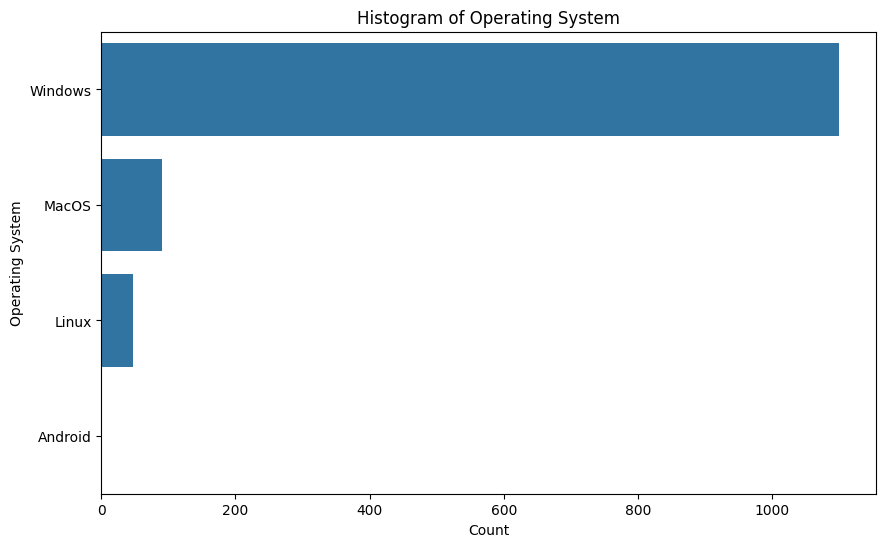

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Operating System', data=df, order=df['Operating System'].value_counts().index)
plt.title('Histogram of Operating System')
plt.xlabel('Count')
plt.ylabel('Operating System')
plt.show()

In [19]:
threshold = 0.01 * len(df)  # Set threshold as 0.5% of the dataset size
screen_name_counts = df['Screen Name'].value_counts()
rare_screen_name = screen_name_counts[screen_name_counts < threshold].index

# Replace rare categories with 'Other'
df['Screen Name'] = df['Screen Name'].apply(lambda x: 'Other Screen Name' if x in rare_screen_name else x)

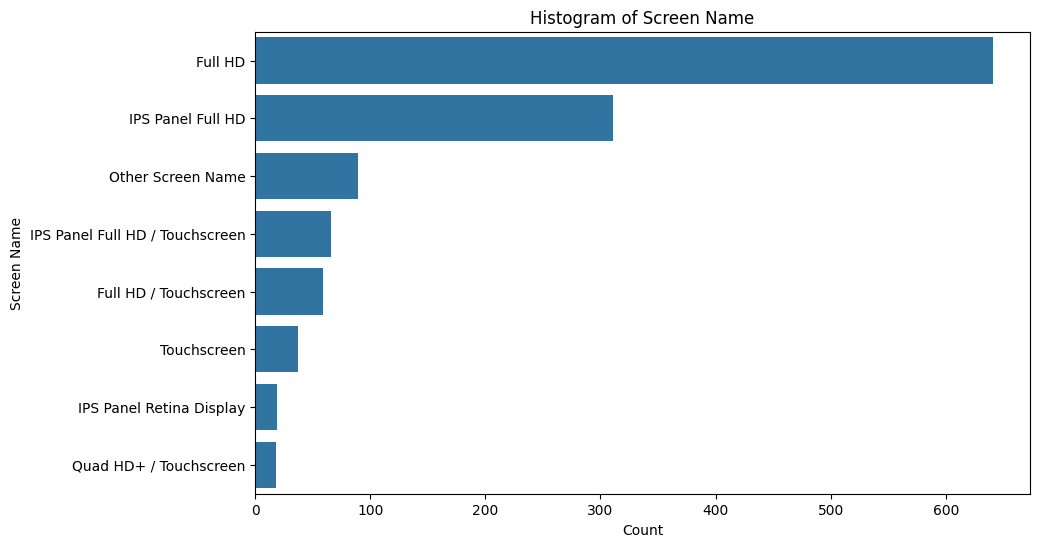

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Screen Name', data=df, order=df['Screen Name'].value_counts().index)
plt.title('Histogram of Screen Name')
plt.xlabel('Count')
plt.ylabel('Screen Name')
plt.show()

In [21]:
df.drop(columns="Resolution Product",inplace=True)

In [22]:
# from autoviz.AutoViz_Class import AutoViz_Class
# AV = AutoViz_Class()
# %matplotlib inline
# AV.AutoViz(filename="", dfte=df, chart_format="svg", max_rows_analyzed=1500, max_cols_analyzed=30)

In [23]:
csv_file_path = 'data/output.csv'
df.to_csv(csv_file_path, index=False)